In [1]:
import netCDF4 as nc
from matplotlib import pyplot as plt
import numpy as np
import glob
import pickle
from salishsea_tools import evaltools as et
import datetime as dt
import os
import re
import cmocean
%matplotlib inline

In [2]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    tmask=mesh.variables['tmask'][0,:,:,:]
    e1t=np.expand_dims(mesh.variables['e1t'][:,:,:],1)
    e2t=np.expand_dims(mesh.variables['e2t'][:,:,:],1)
SOGtmaskPath='/ocean/eolson/MEOPAR/northernNO3PaperCalcs/save/SOGtmask.pkl'
(tmaskSOG,_,_,_,_)=pickle.load(open(SOGtmaskPath,'rb'))

In [3]:
idir='/data/eolson/results/MEOPAR/SS36runs/CedarRuns/shortTestSNAPe3ta/'

In [4]:
fP=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_dian_T*.nc')[0])

In [5]:
fP.variables.keys()

dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'time_instant', 'time_instant_bounds', 'RIVNO3', 'BIOTRNO3', 'PHYSTRNO3', 'ALLTRNO3', 'AFILTNO3', 'NO3_E3T', 'NO3SNAP', 'NO3_E3TSNAP', 'PPDIATNO3V', 'PPPHYNO3V', 'PPMRUBNO3V', 'NITR', 'NO3RADB', 'NO3RADN'])

In [6]:
physSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['PHYSTRNO3'][:,:,:,:],3),2),1)
bioSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['BIOTRNO3'][:,:,:,:],3),2),1)
allSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['ALLTRNO3'][:,:,:,:],3),2),1)
rivSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['RIVNO3'][:,:,:,:],3),2),1)
afiltSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['AFILTNO3'][:,:,:,:],3),2),1)
no3Sum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['NO3SNAP'][:,:,:,:],3),2),1)
nitrSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['NITR'][:,:,:,:],3),2),1)
PPSum=np.sum(np.sum(np.sum(tmaskSOG*(fP.variables['PPDIATNO3V'][:,:,:,:]+\
                                             fP.variables['PPPHYNO3V'][:,:,:,:]+\
                                             fP.variables['PPMRUBNO3V'][:,:,:,:]),3),2),1)

In [7]:
no3SumX=np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fP.variables['NO3_E3TSNAP'][:,:,:,:],3),2),1)
fT=nc.Dataset(glob.glob(idir+'/SalishSea_2160ts_*ptrc_T*.nc')[0])
no3SumTS=np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fT.variables['NO3_E3TSNAP'][:,:,:,:],3),2),1)

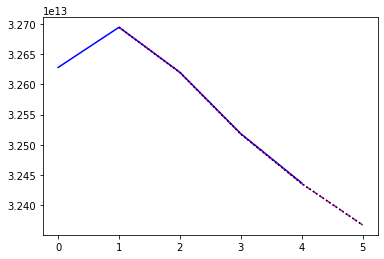

In [8]:
plt.plot(np.arange(0,5),no3Sum,'b-')
plt.plot(np.arange(1,6),no3SumX,'m--')
plt.plot(np.arange(1,6),no3SumTS,'k:')

In [9]:
torig=dt.datetime.strptime(fT.variables['time_counter'].time_origin,'%Y-%m-%d %H:%M:%S')
times=np.array([torig + dt.timedelta(seconds=ii) for ii in fT.variables['time_instant'][:]])
print(times)


[datetime.datetime(2015, 5, 2, 0, 0) datetime.datetime(2015, 5, 3, 0, 0)
 datetime.datetime(2015, 5, 4, 0, 0) datetime.datetime(2015, 5, 5, 0, 0)
 datetime.datetime(2015, 5, 6, 0, 0)]


In [10]:
torig=dt.datetime.strptime(fP.variables['time_instant'].time_origin,'%Y-%m-%d %H:%M:%S')
times=np.array([torig + dt.timedelta(seconds=ii) for ii in fP.variables['time_instant'][:]])
print('time_instant:')
print(times)
torig=dt.datetime.strptime(fP.variables['time_centered'].time_origin,'%Y-%m-%d %H:%M:%S')
times=np.array([torig + dt.timedelta(seconds=ii) for ii in fP.variables['time_centered'][:]])
print('time_centered:')
print(times)

time_instant:
[datetime.datetime(2015, 5, 2, 0, 0) datetime.datetime(2015, 5, 3, 0, 0)
 datetime.datetime(2015, 5, 4, 0, 0) datetime.datetime(2015, 5, 5, 0, 0)
 datetime.datetime(2015, 5, 6, 0, 0)]
time_centered:
[datetime.datetime(2015, 5, 1, 12, 0) datetime.datetime(2015, 5, 2, 12, 0)
 datetime.datetime(2015, 5, 3, 12, 0) datetime.datetime(2015, 5, 4, 12, 0)
 datetime.datetime(2015, 5, 5, 12, 0)]


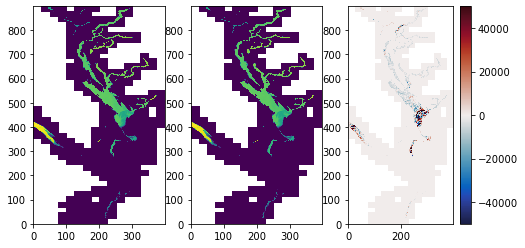

In [11]:
k=30
fig,ax=plt.subplots(1,3,figsize=(8,4))
ax[0].pcolormesh(fP.variables['NO3SNAP'][3,k,:,:])
ax[1].pcolormesh(e1t[0,0,:,:]*e2t[0,0,:,:]*fP.variables['NO3_E3TSNAP'][2,k,:,:])
m=ax[2].pcolormesh(e1t[0,0,:,:]*e2t[0,0,:,:]*fP.variables['NO3_E3TSNAP'][2,k,:,:]-fP.variables['NO3SNAP'][3,k,:,:],
                   cmap=cmocean.cm.balance,vmin=-50000,vmax=50000)
plt.colorbar(m)

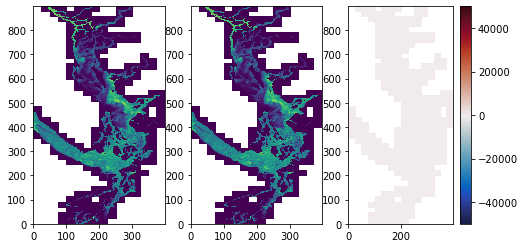

In [12]:
k=10
fig,ax=plt.subplots(1,3,figsize=(8,4))
ax[0].pcolormesh(e1t[0,0,:,:]*e2t[0,0,:,:]*fT.variables['NO3_E3TSNAP'][2,k,:,:])
ax[1].pcolormesh(e1t[0,0,:,:]*e2t[0,0,:,:]*fP.variables['NO3_E3TSNAP'][2,k,:,:])
m=ax[2].pcolormesh(e1t[0,0,:,:]*e2t[0,0,:,:]*(fT.variables['NO3_E3TSNAP'][2,k,:,:]-fP.variables['NO3_E3TSNAP'][2,k,:,:]),
                   cmap=cmocean.cm.balance,vmin=-50000,vmax=50000)
plt.colorbar(m)

In [13]:
no3diff=(no3Sum[1:]-no3Sum[:-1])/(24*3600)
no3diffX=(no3SumX[1:]-no3SumX[:-1])/(24*3600)
#no3diff2=np.concatenate((no3diff,[(np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fT.variables['NO3_E3T'][-1,:,:,:])))-no3sum[-1])/(23*3600)]))

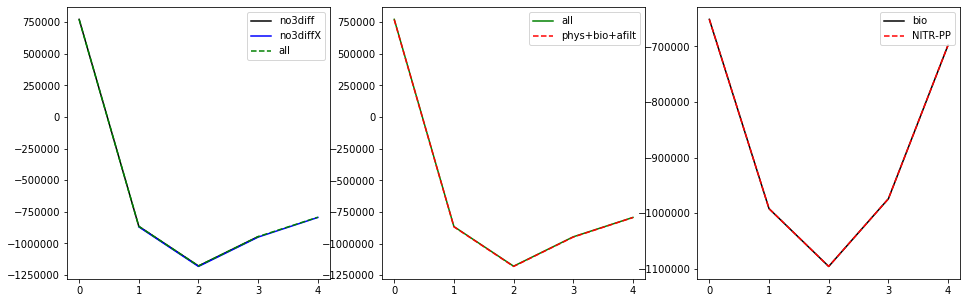

In [14]:
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(range(0,4),no3diff,'k-',label='no3diff')
ax[0].plot(range(1,5),no3diffX,'b-',label='no3diffX')
ax[0].plot(range(0,5),allSum,'g--',label='all')
#ax[0].plot(range(0,5),afiltSum,'b--',label='afilt')
ax[0].legend()
ax[1].plot(range(0,5),allSum,'g-',label='all')
ax[1].plot(range(0,5),physSum+bioSum+afiltSum,'r--',label='phys+bio+afilt')
#ax[1].plot(range(0,5),bioSum,'k-',label='bio')
#ax[1].plot(range(0,5),nitrSum-PPSum,'r--',label='NITR-PP')
ax[1].legend()
ax[2].plot(range(0,5),bioSum,'k-',label='bio')
ax[2].plot(range(0,5),nitrSum-PPSum,'r--',label='NITR-PP')
ax[2].legend()

### Look at small differences in sums:

In [15]:
# phys[trn*cvola-trb*cvolb] + bio[tra*cvol_a/rfac2] + afilt[(trb-trn)*cvol_a] - all
physSum+bioSum+afiltSum-allSum

masked_array(data=[-2136.9375, -1859.6875, -1984.25, -1876.6875, -872.75],
             mask=[False, False, False, False, False],
       fill_value=1e+20,
            dtype=float32)

In [16]:
no3diff-allSum[:4]

masked_array(data=[-26.328148148139007, 7.898611111100763,
                   -0.9833333333954215, -5.760185185237788],
             mask=[False, False, False, False],
       fill_value=1e+20)

In [17]:
no3diffX-allSum[1:]

masked_array(data=[-3610.5030268011615, -3862.1004792388994,
                   -3774.6162643771386, -1690.9742791069439],
             mask=[False, False, False, False],
       fill_value=1e+20)

In [18]:
(no3diffX-allSum[1:])/np.min(allSum)*2160 # scale of difference between XIOS and direct output roughly order of 1 time step trend

masked_array(data=[6.617161008337125, 7.078277046659073,
                   6.917940071137654, 3.0991385363055888],
             mask=[False, False, False, False],
       fill_value=1e+20)

In [19]:
## trends sum - output trends sum
physSum+bioSum+afiltSum-allSum

masked_array(data=[-2136.9375, -1859.6875, -1984.25, -1876.6875, -872.75],
             mask=[False, False, False, False, False],
       fill_value=1e+20,
            dtype=float32)

In [20]:
## trends sum - fortran no3diff
temp=physSum+bioSum+afiltSum
temp[:-1]-no3diff

masked_array(data=[-2110.609351851861, -1867.5861111111008,
                   -1983.2666666666046, -1870.9273148147622],
             mask=[False, False, False, False],
       fill_value=1e+20)

In [21]:
## trends sum - XIOS no3diff
temp=physSum+bioSum+afiltSum
temp[1:]-no3diffX

masked_array(data=[1750.8155268011615, 1877.8504792388994,
                   1897.9287643771386, 818.2242791069439],
             mask=[False, False, False, False],
       fill_value=1e+20)

In [22]:
## bio difference
nitrSum-PPSum-bioSum

masked_array(data=[24.125, 17.375, 26.625, 21.8125, 17.0625],
             mask=[False, False, False, False, False],
       fill_value=1e+20,
            dtype=float32)

In [23]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Malaspina_U*.nc')[0]) as f:
    malUA=np.sum(np.sum(f.variables['NO3TVDX'][:,:,:,0],2),1)
    malUD=np.sum(np.sum(f.variables['ULDFNO3'][:,:,:,0],2),1)

In [24]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Haro_V*.nc')[0]) as f:
    harVA=np.sum(np.sum(f.variables['NO3TVDY'][:,:,0,:],2),1)
    harVD=np.sum(np.sum(f.variables['VLDFNO3'][:,:,0,:],2),1)

In [25]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_SJC_V*.nc')[0]) as f:
    sjcVA=np.sum(np.sum(f.variables['NO3TVDY'][:,:,0,:],2),1)
    sjcVD=np.sum(np.sum(f.variables['VLDFNO3'][:,:,0,:],2),1)

In [26]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Rosario_V*.nc')[0]) as f:
    rosVA=np.sum(np.sum(f.variables['NO3TVDY'][:,:,0,:],2),1)
    rosVD=np.sum(np.sum(f.variables['VLDFNO3'][:,:,0,:],2),1)

In [27]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Sutil_V*.nc')[0]) as f:
    sutVA=np.sum(np.sum(f.variables['NO3TVDY'][:,:,0,:],2),1)
    sutVD=np.sum(np.sum(f.variables['VLDFNO3'][:,:,0,:],2),1)

In [28]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Discovery_V*.nc')[0]) as f:
    disVA=np.sum(np.sum(f.variables['NO3TVDY'][:,:,0,:],2),1)
    disVD=np.sum(np.sum(f.variables['VLDFNO3'][:,:,0,:],2),1)

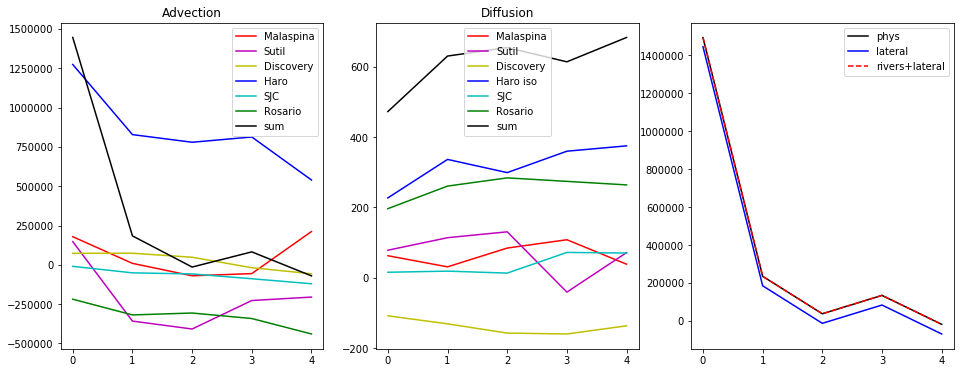

In [29]:
fig,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].plot(range(0,5),-1*malUA,'r-',label='Malaspina')
ax[0].plot(range(0,5),-1*sutVA,'m-',label='Sutil')
ax[0].plot(range(0,5),-1*disVA,'y-',label='Discovery')
ax[0].plot(range(0,5),harVA,'b-',label='Haro')
ax[0].plot(range(0,5),sjcVA,'c-',label='SJC')
ax[0].plot(range(0,5),rosVA,'g-',label='Rosario')
adv=harVA+sjcVA+rosVA-disVA-sutVA-malUA
ax[0].plot(range(0,5),adv,'k-',label='sum')
ax[0].legend()
ax[0].set_title('Advection')
ax[1].plot(range(0,5),-1*malUD,'r-',label='Malaspina')
ax[1].plot(range(0,5),-1*sutVD,'m-',label='Sutil')
ax[1].plot(range(0,5),-1*disVD,'y-',label='Discovery')
ax[1].plot(range(0,5),harVD,'b-',label='Haro iso')
ax[1].plot(range(0,5),sjcVD,'c-',label='SJC')
ax[1].plot(range(0,5),rosVD,'g-',label='Rosario')
dif=harVD+sjcVD+rosVD-disVD-sutVD-malUD
ax[1].plot(range(0,5),dif,'k-',label='sum')
ax[1].legend()
ax[1].set_title('Diffusion')
ax[2].plot(range(0,5),physSum,'k-',label='phys')
ax[2].plot(range(0,5),adv+dif,'b-',label='lateral')
ax[2].plot(range(0,5),adv+dif+rivSum,'r--',label='rivers+lateral')
#ax[2].plot(np.arange(0.5,4,1),no3diff,'k--',label='no3diff')
ax[2].legend()

In [30]:
# phys di
adv+dif+rivSum-physSum

masked_array(data=[832.875, -314.078125, 138.09375, 10.578125, -114.59375],
             mask=[False, False, False, False, False],
       fill_value=1e+20,
            dtype=float32)

In [31]:
## total, XIOS version:
adv[1:]+dif[1:]+rivSum[1:]+nitrSum[1:]-PPSum[1:]+afiltSum[1:]-no3diffX

masked_array(data=[1454.0655268011615, 2042.6004792388994,
                   1930.3037643771386, 720.7242791069439],
             mask=[False, False, False, False],
       fill_value=1e+20)

In [32]:
## total, fortran version:
adv[:-1]+dif[:-1]+rivSum[:-1]+nitrSum[:-1]-PPSum[:-1]+afiltSum[:-1]-no3diff

masked_array(data=[-1253.609351851861, -2164.3361111111008,
                   -1818.5166666666046, -1838.5523148147622],
             mask=[False, False, False, False],
       fill_value=1e+20)

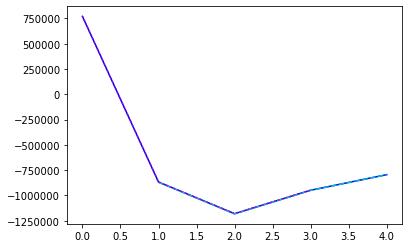

In [33]:
plt.plot(range(0,5),adv+dif+rivSum+nitrSum-PPSum+afiltSum,'b-')
plt.plot(range(1,5),no3diffX,'c--')
plt.plot(range(0,4),no3diff,'m:')

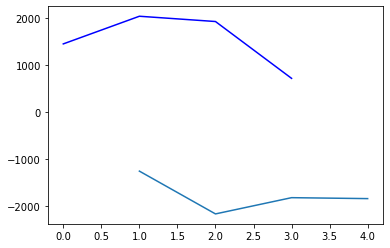

In [34]:
plt.plot(range(0,4),adv[1:]+dif[1:]+rivSum[1:]+nitrSum[1:]-PPSum[1:]+afiltSum[1:]-no3diffX,'b-')
plt.plot(range(1,5),adv[:-1]+dif[:-1]+rivSum[:-1]+nitrSum[:-1]-PPSum[:-1]+afiltSum[:-1]-no3diff)